****
# Cross-Validation in a SVM problem
****
<p style="text-align:right"><i>Jesus Perez Colino<br>First version: November 2016</i></p>

## About this notebook: 
****
Notebook prepared by **Jesus Perez Colino** Version 0.2, First Released: 01/10/2016, Alpha

- This work is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). This work is offered for free, with the hope that it will be useful.


- **Summary**: This Jupyter notebook is an exercise about cross validation with grid search for SVM

In [1]:
import IPython
import numpy as np
from sys import version 
import seaborn as sns
from sklearn import __version__
print (' Reproducibility conditions for this notebook '.center(85,'-'))
print ('Python version:       ' + version)
print ('Scikit-learn version: ' + __version__)
print ('Numpy version:        ' + np.__version__)
print ('IPython version:      ' + IPython.__version__)
print ('-'*85)

-------------------- Reproducibility conditions for this notebook -------------------
Python version:       3.5.3 |Anaconda 4.4.0 (x86_64)| (default, Mar  6 2017, 12:15:08) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]
Scikit-learn version: 0.18.1
Numpy version:        1.12.1
IPython version:      5.3.0
-------------------------------------------------------------------------------------


## Introduction: Cross Validation in a Logistic Regression

In [3]:
# Getting the data sample engine and building the sample

from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=0)

In [4]:
# Splitting the sample

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [74]:
# Fitting the model

from sklearn.linear_model import LogisticRegression
mylogreg = LogisticRegression().fit(X_train,y_train)

In [76]:
# Evaluate the model out-the-sample

print("Test score: {:.2f}".format(mylogreg.score(X_test,y_test)))

Test score: 0.88


In [89]:
# Evaluate using Cross-Validation in the training set

from sklearn.model_selection import cross_val_score
scores_mylogreg = cross_val_score(mylogreg, X_train, y_train, cv = 3)
print("Test score: {}".format(scores_mylogreg.round(2)),'\n')
print("Average cross-validation score: {:.2f}".format(scores_mylogreg.mean()))

Test score: [ 0.85  0.88  0.96] 

Average cross-validation score: 0.89


In [97]:
# Evaluate using Leave-one-out Cross-Validation

from sklearn.model_selection import cross_val_score, LeaveOneOut
loo = LeaveOneOut()
scores_mylogreg = cross_val_score(mylogreg, X_train, y_train, cv = loo)
print('Number of CV interations: {}'.format(len(scores_mylogreg),'\n'))
print("Test score: \n{}".format(scores_mylogreg),'\n')
print("Average cross-validation score: {:.2f}".format(scores_mylogreg.mean()))

Number of CV interations: 75
Test score: 
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.
  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.  1.  0.  0.  1.  1.
  1.  1.  1.  1.  1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  0.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.] 

Average cross-validation score: 0.91


# Grid-Search and Cross-Validation for a SVM

In [98]:
# Loading a new sample of data for the next example

from sklearn.datasets import load_iris
iris = load_iris()

In [99]:
# Triple splitting of sample in training, validation and testing samples

X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X_trainval, y_trainval, random_state=0)

In [146]:
# Defining the parameter space to do the search

param_grid = {'C': np.linspace(0.001, 100, 25),
             'gamma': np.linspace(0.001, 100, 25)}

In [147]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-03,   4.16763e+00,   8.33425e+00,   1.25009e+01,
         1.66675e+01,   2.08341e+01,   2.50008e+01,   2.91674e+01,
         3.33340e+01,   3.75006e+01,   4.16672e+01,   4.58339e+01,
         5.00005e+01,   5.41671e+01,   5.83337e+01,   6.25004e+01,
         6.6667...1669e+01,
         8.33335e+01,   8.75001e+01,   9.16668e+01,   9.58334e+01,
         1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [148]:
print('CV Train score: {:.2f}'.format(grid_search.best_score_))
print("Test score: {:.2f}".format(grid_search.score(X_test, y_test)))
print('Best parameters: {}'.format(grid_search.best_params_))

CV Train score: 0.96
Test score: 0.96
Best parameters: {'C': 29.167375, 'gamma': 0.001}


In [178]:
import pandas as pd
results = pd.DataFrame(grid_search.cv_results_)
results.iloc[:,:7].head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params
0,0.000398,0.000587,0.404762,0.412910,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}"
1,0.000592,0.000200,0.392857,0.407028,0.001,4.16763,"{'C': 0.001, 'gamma': 4.167625}"
2,0.001000,0.000000,0.380952,0.404086,0.001,8.33425,"{'C': 0.001, 'gamma': 8.33425}"
3,0.000609,0.000402,0.369048,0.395263,0.001,12.5009,"{'C': 0.001, 'gamma': 12.500875}"
4,0.000589,0.000000,0.357143,0.389381,0.001,16.6675,"{'C': 0.001, 'gamma': 16.6675}"


In [156]:
scores = np.array(results.mean_test_score).reshape(25,25)

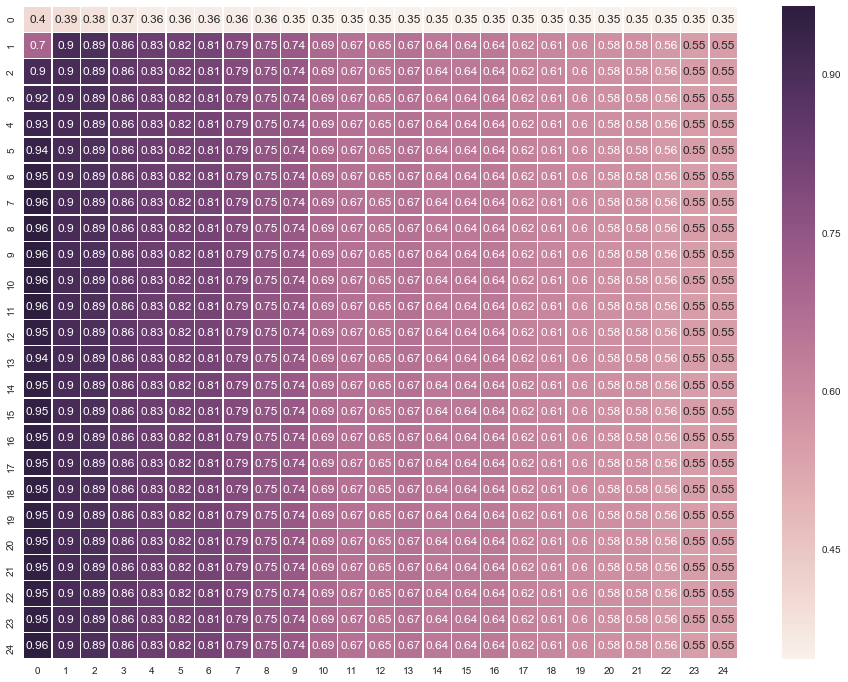

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
f, ax = plt.subplots(figsize=(16,12))
sns.heatmap(scores, annot=True, linewidths=.5, ax=ax)

# Nested Cross-Validation for a SVM Classification

In [181]:
# Instead of splitting the original data into training and test sets once, use multiple 
# splits of cross-validation: NESTED CROSS-VALIDATION.

# Here an outer looop over splits of the data into training and test sets. For each of them, 
# a grid search is run. Then, for each outer split, the test set score using the best settings 
# is reported. These scores will tell us how well a given model works on a particular dataset.

scores = cross_val_score(GridSearchCV(svc, param_grid, cv=5),
                        iris.data, iris.target, cv=5)
print('Cross-validation scores: ', scores)
print('Mean cross-validation scores: ', scores.mean().round(3))

Cross-validation scores:  [ 0.93333333  1.          0.9         0.93333333  1.        ]
Mean cross-validation scores:  0.953
